In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
titanic = pd.read_excel("/SBA/titanic.xlsx",
                        sheet_name = 0,
                        header     = 0)

In [5]:
# 문제
# 1. survived : 질적 자료
# 빈도, 백분율, 막대그래프, 원그래프

# 2. age -> age_group
# 0  ~ 20 -> 20대 미만
# 20 ~ 40 -> 2~30대
# 40 ~ 60 -> 4~50대
# 60 ~ 90 -> 60대 이상
# age_group의 빈도, 백분율
# age : 히스토그램, 상자그림
# age : 기술통계량

# 3. survived VS Pclass
# 교차표, 막대그래프

# 4. survived VS age
# survived 별 age의 상자그림
# survived 별 기술통계량

- - -

In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# 빈도
titanic.Survived.value_counts()

0    815
1    494
Name: Survived, dtype: int64

In [12]:
# 백분율
round(titanic.Survived.value_counts(normalize = True) * 100, 1)

0    62.3
1    37.7
Name: Survived, dtype: float64

In [55]:
survived_frequency = titanic.Survived.value_counts(ascending = False)
survived_frequency

0    815
1    494
Name: Survived, dtype: int64

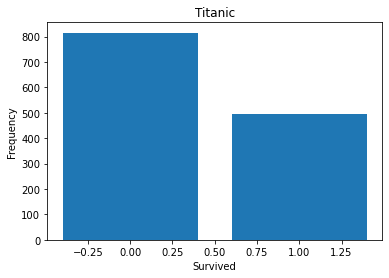

In [58]:
plt.bar(x = survived_frequency.index, height = survived_frequency)
plt.title("Titanic")
plt.xlabel("Survived")
plt.ylabel("Frequency")
plt.show()

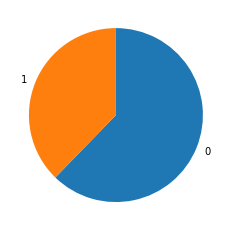

In [56]:
plt.pie(x            = survived_frequency,
        labels        = survived_frequency.index,
        counterclock = False,
        startangle   = 90)
plt.show()

- - -

In [25]:
# 문제 2
titanic["age_group"] = pd.cut(titanic.Age,
                                bins   = [0, 20, 40, 60, 90],
                                right  = False,
                                labels = ["20대 미만", "2~30대", "4~50대", "60대 이상"])

In [26]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2~30대
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2~30대
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2~30대
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2~30대
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2~30대


In [27]:
# 빈도
titanic.age_group.value_counts()

2~30대     576
20대 미만    225
4~50대     205
60대 이상     40
Name: age_group, dtype: int64

In [28]:
# 백분율
round(titanic.age_group.value_counts(normalize = True) * 100, 1)

2~30대     55.1
20대 미만    21.5
4~50대     19.6
60대 이상     3.8
Name: age_group, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


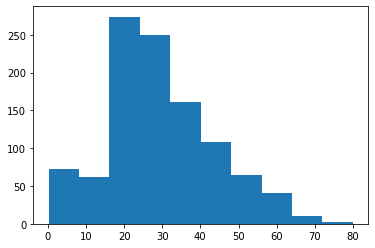

In [29]:
# 히스토그램
plt.hist(x = titanic.Age)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


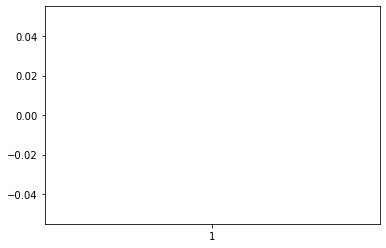

In [44]:
# 박스 그림
plt.boxplot(x = titanic.Age)
plt.show()

In [45]:
# 기술통계량
titanic.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [47]:
# Survived VS Pclass
# (1) 교차표
pd.crosstab(titanic.Survived, titanic.Pclass, margins = True)

Pclass,1,2,3,All
Survived,,,,
0,137,160,518,815
1,186,117,191,494
All,323,277,709,1309


In [48]:
round(pd.crosstab(titanic.Survived, titanic.Pclass, margins = True, 
            normalize = True)*100, ndigits = 1)

Pclass,1,2,3,All
Survived,,,,
0,10.5,12.2,39.6,62.3
1,14.2,8.9,14.6,37.7
All,24.7,21.2,54.2,100.0


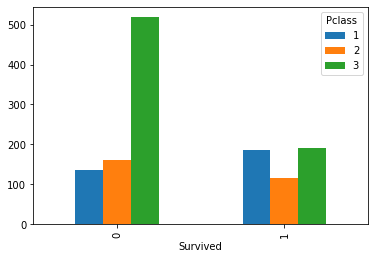

In [60]:
# (2) 막대그래프
cross_table = pd.crosstab(titanic.Survived, titanic.Pclass)
cross_table.plot.bar(stacked = False)

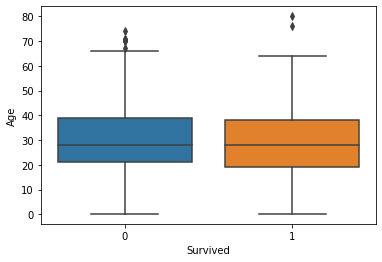

In [50]:
# 4. Survived VS Age
sns.boxplot(x = titanic.Survived, y = titanic.Age)
plt.show()

In [52]:
# (2) 집단별 기술통계량
titanic.groupby("Survived").Age.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,629.0,30.510986,13.912218,0.33,21.0,28.0,39.0,74.0
1,417.0,28.931079,15.105581,0.17,19.0,28.0,38.0,80.0
